In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/Livanty/DatasetW2/refs/heads/main/breast-cancer.csv') #Membaca file data csv
df.head() #Menunjukan 5 data teratas

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.info() #digunakan untuk menampilkan ringkasan informasi tentang struktur DataFrame, termasuk jumlah baris, kolom, tipe data, nilai non-null, dan penggunaan memori.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
df.describe() #digunakan untuk menghasilkan statistik deskriptif (seperti mean, median, standar deviasi, dan quartiles) untuk kolom numerik dalam DataFrame.

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


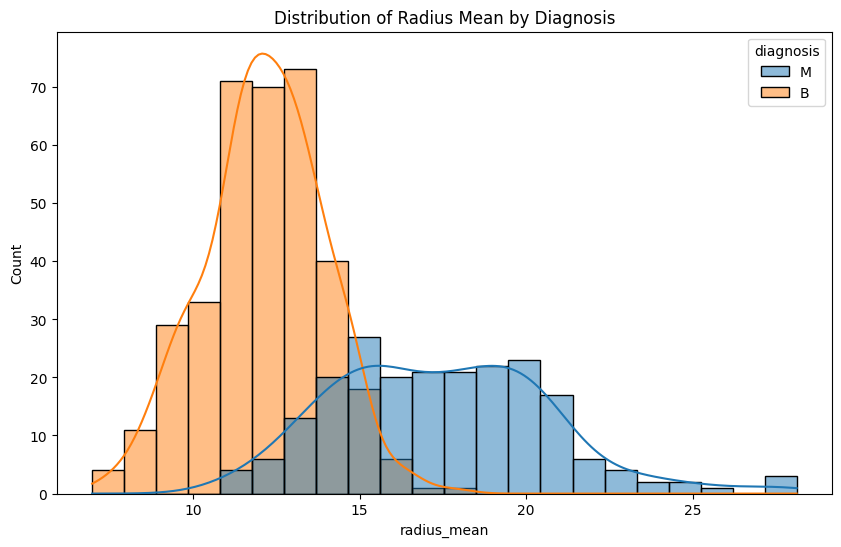

In [13]:
# Membuat histogram
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='radius_mean', kde=True, hue='diagnosis')

# Menambahkan judul dan label

plt.title('Distribution of Radius Mean by Diagnosis')
plt.show()
# Grafik ini menunjukkan distribusi "radius_mean" berdasarkan diagnosis (0 untuk Benign dan 1 untuk Malignant).
# Tujuan dari visualisasi ini adalah untuk membandingkan distribusi mean radius sel pada pasien yang didiagnosis Benign dan Malignant.
#dari grafik ini menunjukkan bahwa pasien dengan diagnosis Malignant cenderung memiliki ukuran sel yang lebih besar (radius_mean yang lebih tinggi) dibandingkan dengan pasien Benign.

Text(0, 0.5, 'Area Mean')

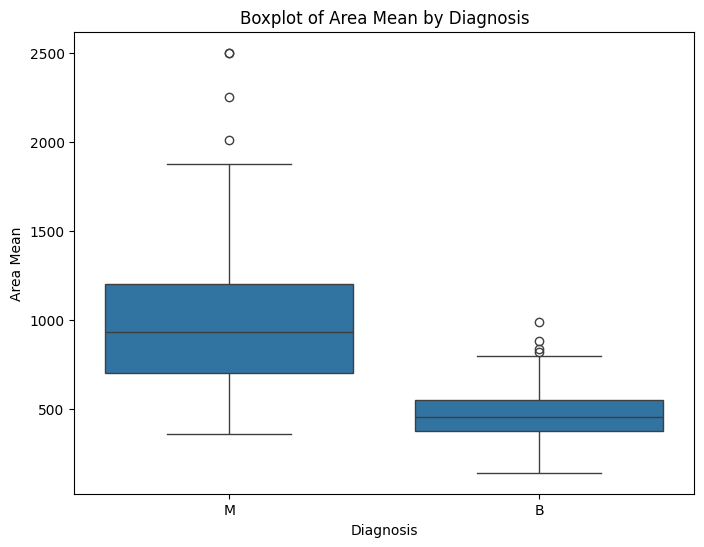

In [14]:
# Membuat boxplot untuk area_mean berdasarkan diagnosis
plt.figure(figsize=(8,6))
sns.boxplot(x='diagnosis', y='area_mean', data=df)

# Menambahkan judul dan label
plt.title('Boxplot of Area Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Area Mean')

# Visualisasi ini adalah boxplot yang menunjukkan distribusi nilai area_mean berdasarkan diagnosis (0: benign, 1: malignant).
# Tujuan dari grafik ini adalah untuk melihat perbedaan antara area rata-rata (area_mean) jaringan sel kanker pada pasien yang memiliki diagnosis tumor jinak (benign) dan tumor ganas (malignant).
# Hasil yang didapatkan menunjukkan bahwa pasien dengan diagnosis malignant (1) cenderung memiliki nilai area_mean yang lebih tinggi dibandingkan dengan pasien yang memiliki diagnosis benign (0).

In [15]:
label_encoder = LabelEncoder() # Membuat objek LabelEncoder dari scikit-learn, yang digunakan untuk mengubah data kategorikal menjadi nilai numerik
df['diagnosis']=label_encoder.fit_transform(df['diagnosis']) # Menerapkan Label Encoding pada kolom diagnosis
df.head() #Menunjukan 5 data teratas

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


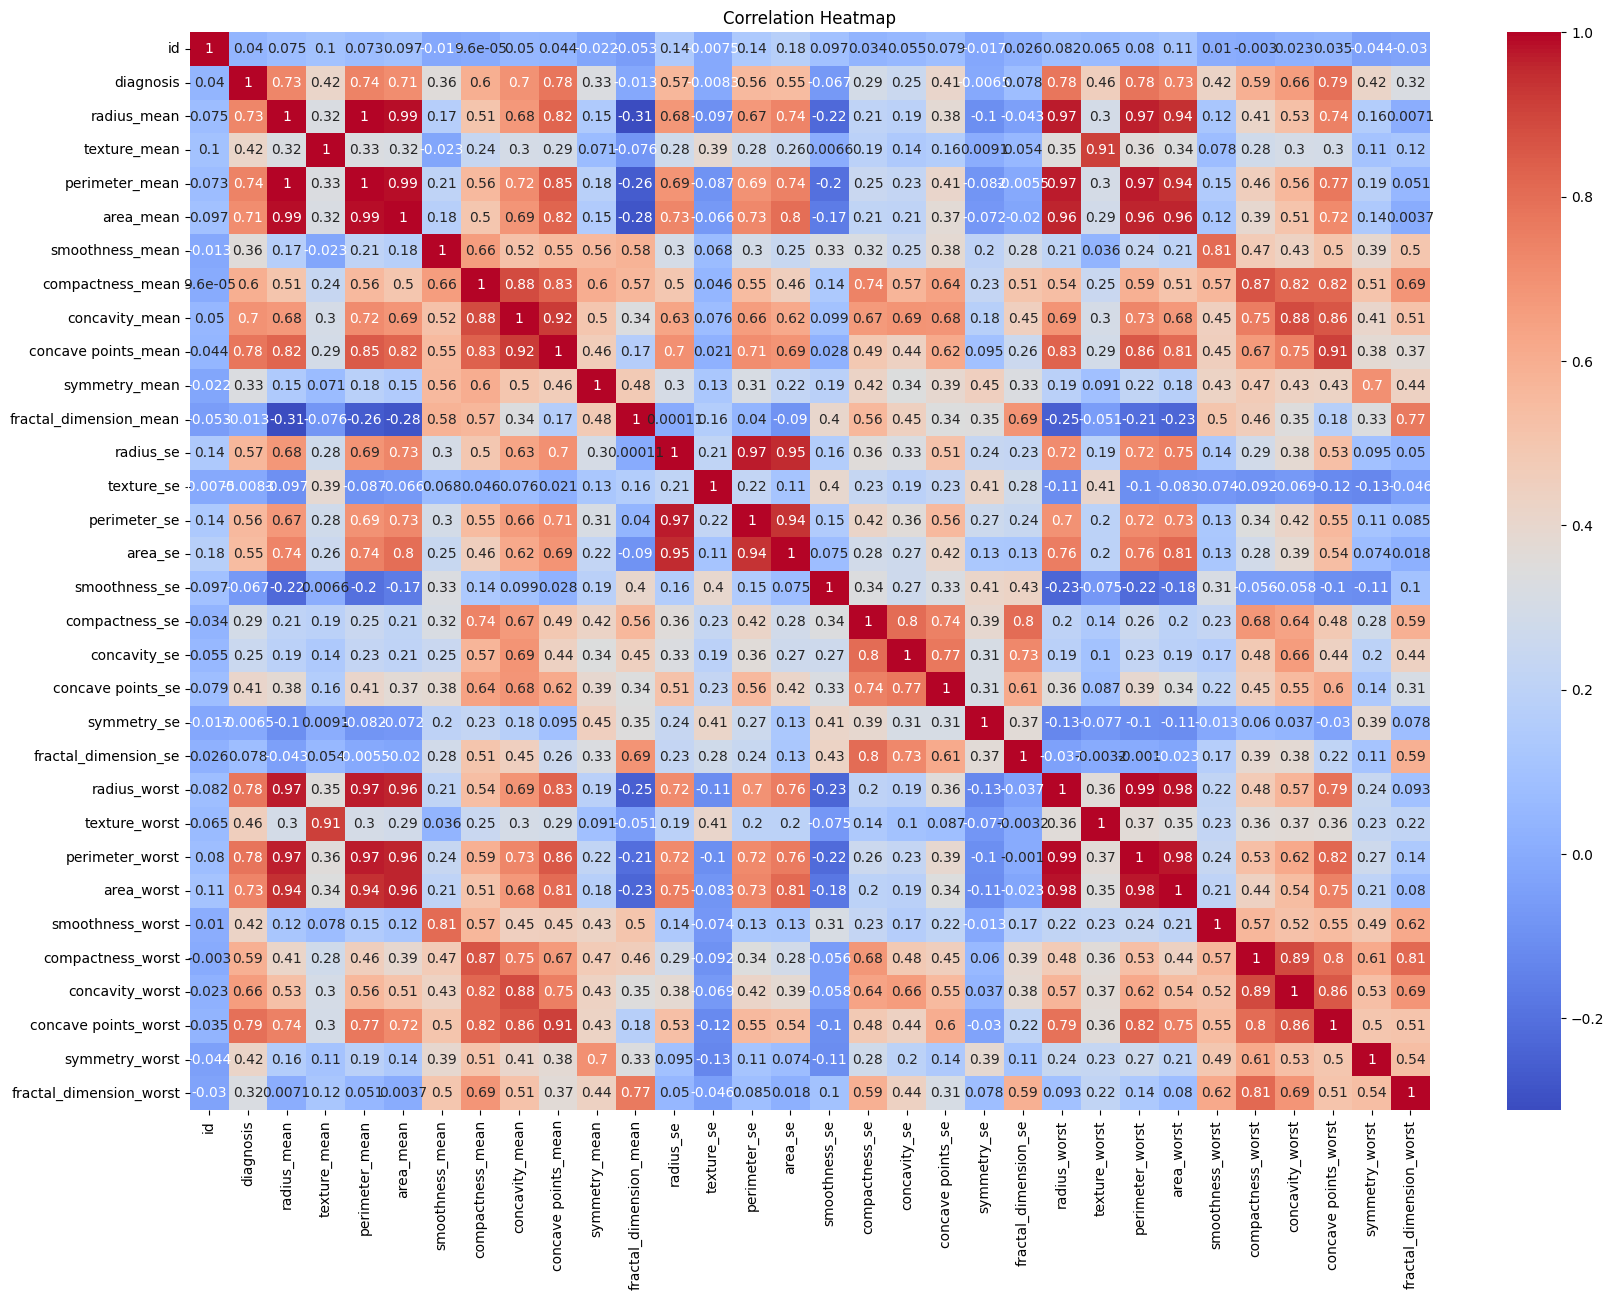

In [45]:
# Menghitung korelasi
corr_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Menambahkan judul
plt.title('Correlation Heatmap')
plt.show()
# Heatmap yang ditampilkan di atas menunjukkan korelasi antara berbagai fitur dalam dataset kanker payudara, di mana nilai korelasi berkisar antara -1 hingga 1.
# Korelasi positif yang kuat (mendekati 1) ditunjukkan oleh warna merah tua, sedangkan korelasi negatif yang kuat (mendekati -1) ditunjukkan oleh warna biru tua.

In [17]:
X = df.drop(['diagnosis'], axis = 1) #Membuat variabel X yang berisi semua kolom dari DataFrame df, kecuali kolom diagnosis.
y = df['diagnosis'] #Membuat variabel y yang berisi kolom diagnosis dari DataFrame df.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) #untuk membagi dataset menjadi dua bagian: satu untuk pelatihan (training 80%) dan satu untuk pengujian (testing 20%).

In [19]:
X_train.shape, X_test.shape # untuk menunjukkan jumlah baris dan kolom

((455, 31), (114, 31))

Decision Tree

In [20]:
#Criterion Entropy
#a
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [21]:
#b
y_pred_en = clf_en.predict(X_test) #untuk mendapatkan hasil prediksi tentang outcome penguin dari data pengujian

In [22]:
#c
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en))) #print hasil akurasi

Model accuracy score with criterion entropy: 0.9649


In [23]:
#d
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9802
Test set score: 0.9649


[Text(0.5769230769230769, 0.875, 'x[8] <= 0.051\nentropy = 0.952\nsamples = 455\nvalue = [286, 169]'),
 Text(0.3076923076923077, 0.625, 'x[21] <= 16.83\nentropy = 0.314\nsamples = 282\nvalue = [266, 16]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[14] <= 48.7\nentropy = 0.136\nsamples = 263\nvalue = [258, 5]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.091\nsamples = 260\nvalue = [257, 3]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.46153846153846156, 0.375, 'x[2] <= 16.19\nentropy = 0.982\nsamples = 19\nvalue = [8, 11]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(0.8461538461538461, 0.625, 'x[23] <= 114.45\nentropy = 0.517\nsamples = 173\nvalue = [20, 153]'),
 Text(0.7115384615384615, 0.75, '  False'),
 Text(0.7692307692307693, 0.375, 'x[22] <= 25.655\nentropy = 0.994

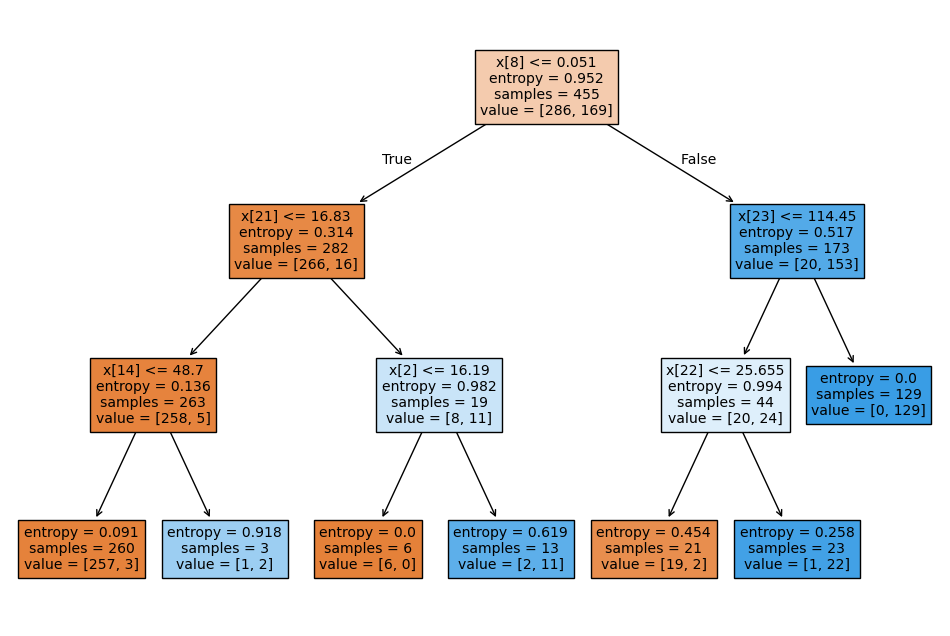

In [24]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train), filled=True) #Membuat tree yang ada warnanya


In [25]:
#a

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [26]:
#b
y_pred_gini = clf_gini.predict(X_test)  #untuk mendapatkan hasil prediksi tentang spesies penguin dari data pengujian menggunakan gini

In [27]:
#c
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini))) #Untuk print hasil akurasi

Model accuracy score with criterion gini: 0.9474


In [28]:
#d
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9780
Test set score: 0.9474


[Text(0.5, 0.875, 'x[8] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.25, 0.625, 'x[21] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[14] <= 48.7\ngini = 0.037\nsamples = 263\nvalue = [258, 5]'),
 Text(0.0625, 0.125, 'gini = 0.023\nsamples = 260\nvalue = [257, 3]'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.375, 0.375, 'x[2] <= 16.19\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4375, 0.125, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.75, 0.625, 'x[28] <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [20, 153]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[23] <= 115.25\ngini = 0.5\nsamples = 35\nvalue = [18, 17]'),
 Text(0.5625, 0.125, 'gini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.875, 0.375, 'x[

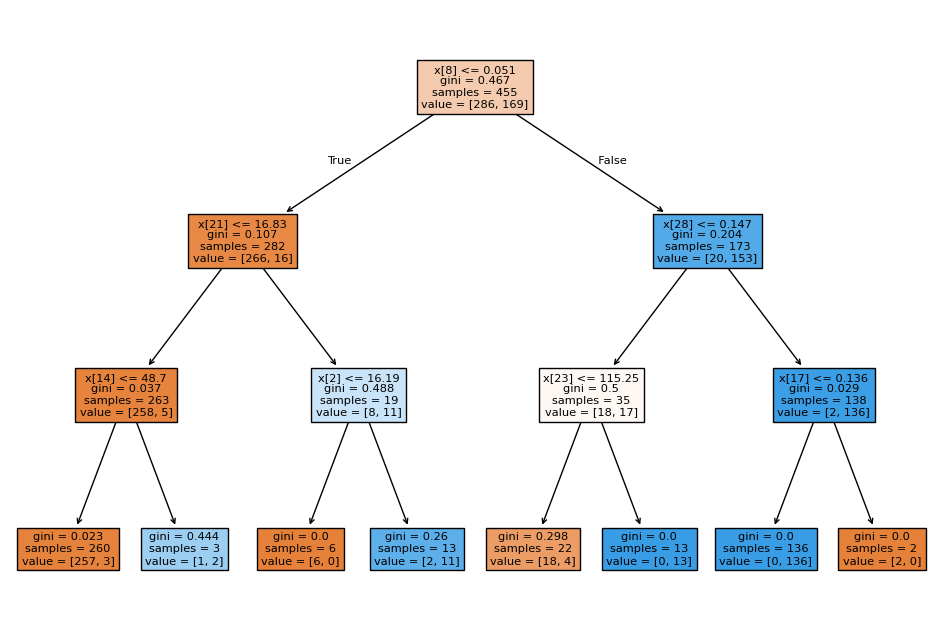

In [29]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled=True) #membuat dan menujukan tree


In [30]:
#f
cm = confusion_matrix(y_test, y_pred_en) #Untuk membuat confusion matrix
print("Confusion Matrix:\n", cm)

cm = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[71  0]
 [ 4 39]]
Confusion Matrix:
 [[69  2]
 [ 4 39]]


In [31]:
#g
print(classification_report(y_test, y_pred_en)) #untuk membuat dan print classificaton report
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [32]:
#h
# Kedua model menunjukkan performa yang baik dalam mengklasifikasikan kanker payudara berdasarkan kolom yang ada, baik untuk train set dan test set.
# Model accuracy score with criterion entropy: 0.9649
# Model accuracy score with criterion gini: 0.9474
# Namun jika kita lihat model dengan kriteria entropi memberikan hasil yang lebih akurat dibandingkan dengan kriteria gini.

Naive Bayes

In [33]:
#a
nb_classifier = GaussianNB() # untuk menginstansiasi objek Gaussian Naive Bayes dari pustaka scikit-learn.
nb_classifier.fit(X_train, y_train) # untuk melatih model Naive Bayes yang telah dibuat (nb_classifier) dengan data fitur X_train dan label y_train.

GaussianNB()

In [34]:
#b
nb_y_pred = nb_classifier.predict(X_test) # untuk memprediksi label (target) menggunakan model Naive Bayes yang telah dilatih sebelumnya (nb_classifier).

In [35]:
#c
cm = confusion_matrix(y_test, nb_y_pred) #Untuk membuat confussion matrix dari nb
print("Confusion Matrix:\n", cm)

#d
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred))) #Untuk menujukan hasil akurasi

Confusion Matrix:
 [[70  1]
 [43  0]]
Accuracy Score: 0.6140


In [36]:
#e
print(classification_report(y_test, nb_y_pred)) #Untuk print classification report

              precision    recall  f1-score   support

           0       0.62      0.99      0.76        71
           1       0.00      0.00      0.00        43

    accuracy                           0.61       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.39      0.61      0.47       114



In [37]:
# f
# Dari hasil yang didapat akurasi yang dimiliki oleh naive bayes ini bisa dikatakan cukup jelek karena  mendapatkan Accuracy Score: 0.6140
# Artinya model naive ini kurang cocok dalam mendeteksi breast cancer.

Logistic regresion

In [38]:
# Menggunakan Metode Logistic regresion
# a define the model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)  # membuat model logisticc regresion


LogisticRegression(max_iter=200)

In [39]:
# b
y_pred_log = classifier.predict(X_test) # membuat prediksi
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})
comparison_table.head() # menampilkan 5 baris pertama dari DataFrame

,y_test,y_pred
204,0,0
70,1,1
131,1,1
431,0,0
540,0,0


In [40]:
#c
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log))) # print hasil accuracy score

Accuracy Score: 0.9561


In [41]:
# d
cmatrix = confusion_matrix(y_test, y_pred_log)  #untuk membuat matrix
print("Confusion Matrix:\n", cmatrix)

Confusion Matrix:
 [[70  1]
 [ 4 39]]


In [42]:
# e
print (classification_report (y_test, y_pred_log)) # print hasil classification report

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [43]:
# f
# Logistic Regresin disini menujukan hasil Accuracy Score: 0.9561 yang brati diatas 90 %
# Ini menujukan bahwa model logistic regresion ini cocok digunakan untuk mendeteksi breast cancer.

KNN

In [47]:
# Menggunakan Metode KNN
# a define the model
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean') # Membuat model KNN dengan 5 tetangga terdekat dan menggunakan metric euclidean
classifier.fit(X_train, y_train) # Untuk melatih model

KNeighborsClassifier(metric='euclidean')

In [48]:
# b. Predict the test set results
y_pred = classifier.predict(X_test) # Membuat prediksi y_pred dari model klasifikasi menggunakan X_test

# Membuat dataframe untuk membandingkan y_test dan y_pred secara berdampingan
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
comparison_table = comparison_table.reset_index(drop=True)
comparison_table.head()

,y_test,y_pred
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0


In [49]:
#c. Check accuracy score
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred))) #Untuk menujukan hasil akurasi

Accuracy Score: 0.7544


In [50]:
# d. Confusion matrix
# Display the accuracy score
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[63  8]
 [20 23]]


In [51]:
# e. Classification report
print(classification_report(y_test, y_pred)) #Untuk print classification report

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        71
           1       0.74      0.53      0.62        43

    accuracy                           0.75       114
   macro avg       0.75      0.71      0.72       114
weighted avg       0.75      0.75      0.74       114



In [ ]:
# Accuracy Score KNN: 0.7544, Model KNN disini mendapatkan score yang cukup baik dalam mendeteksi breast cancer ini
# Dari data ini Model accuracy score with criterion gini: 0.9474, Model accuracy score with criterion entropy: 0.9649, Model Naive Bayes: 0.6140, Model Logistic Regresion: 0.9561, Model KNN: 0.7544
# Sehingga untuk prediksi breast cancer ini lebih disarankan menggunakan 1. Entropi 2. Logistic Regresion 3. Gini 4. KNN 5. Naive